In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Estilo dos gráficos
sns.set(style="whitegrid")

# Carregar os datasets
export_df = pd.read_csv("zProjeto_Final/Datasets/Exportacao.csv")
producao_df = pd.read_csv("zProjeto_Final/Datasets/Tudo_Junto.csv")
clima_df = pd.read_csv("zProjeto_Final/Datasets/resumo_climatico_anual.csv")
economia_df = pd.read_csv("zProjeto_Final/Datasets/dados_economicos.csv")

In [4]:

# Padronizar nomes das colunas
export_df.columns = export_df.columns.str.strip().str.lower().str.replace(" ", "_")
producao_df.columns = producao_df.columns.str.strip().str.lower().str.replace(" ", "_")
clima_df.columns = clima_df.columns.str.strip().str.lower().str.replace(" ", "_")
economia_df.columns = economia_df.columns.str.strip().str.lower().str.replace(" ", "_")

# Converter tipos corretamente
export_df["quantidade_(kg)"] = pd.to_numeric(export_df["quantidade_(kg)"], errors='coerce')
export_df["ano"] = export_df["ano"].astype(int)

# Converter KG para L (1kg = 1L)
export_df["litros"] = export_df["quantidade_(kg)"]

# Tratar dados climáticos (mensais)
clima_df["ano"] = clima_df["ano"].astype(int)
clima_df = clima_df[clima_df["ano"].between(2010, 2024)]

# Agrupar clima por ano (média anual)
clima_anual = clima_df.groupby("ano").agg({
    "temperatura_c_mean": "mean",
    "temperatura_c_max": "mean",
    "temperatura_c_min": "mean",
    "precipitacao_mm_mean": "mean",
    "precipitacao_mm_max": "mean",
    "precipitacao_mm_min": "mean",
    "vento_m_s_mean": "mean",
    "vento_m_s_max": "mean",
    "vento_m_s_min": "mean"
}).reset_index()

# Renomear para facilitar
clima_anual.rename(columns={
    "temperatura_c_mean": "temp_media",
    "temperatura_c_max": "temp_max",
    "temperatura_c_min": "temp_min",
    "precipitacao_mm_mean": "precip_media",
    "precipitacao_mm_max": "precip_max",
    "precipitacao_mm_min": "precip_min",
    "vento_m_s_mean": "vento_media",
    "vento_m_s_max": "vento_max",
    "vento_m_s_min": "vento_min"
}, inplace=True)

# Agrupar exportações por ano
export_por_ano = export_df.groupby("ano")["litros"].sum().reset_index()

# Juntar clima + exportações
clima_export = pd.merge(clima_anual, export_por_ano, on="ano")

# Exibir o resultado
print(clima_export)


     ano  temp_media   temp_max   temp_min  precip_media  precip_max  \
0   2010   18.501783  23.965574  14.024194    138.600572  218.093548   
1   2011   18.384845  23.600000  13.126471    143.197044  223.630508   
2   2012   19.411863  23.961404  13.170833    119.029414  207.097222   
3   2013   18.410761  23.233824  13.533846    141.005341  188.575000   
4   2014   19.606506  24.127692  14.986792    157.748645  233.142857   
5   2015   19.447548  23.313433  15.272549    171.662864  270.496875   
6   2016   18.491681  23.908197  11.302000    137.735716  212.288889   
7   2017   19.241387  23.420968  15.050847    153.077257  257.014706   
8   2018   18.818912  22.410959  13.445161    134.227207  215.605333   
9   2019   19.367996  24.116000  13.573529    134.957075  225.626667   
10  2020   18.958353  23.043590  13.855172    108.543853  164.428125   
11  2021   18.326734  22.760714  12.391304    112.854147  243.179592   
12  2022   18.353160  24.522951  13.047500    138.915715  204.54

In [5]:
# Filtro para os últimos 15 anos (2010 a 2024)
anos_validos = list(range(2010, 2025))

export_df = export_df[export_df["ano"].isin(anos_validos)]
producao_df = producao_df[producao_df["ano"].isin(anos_validos)]
clima_df = clima_df[clima_df["ano"].isin(anos_validos)]
economia_df = economia_df[economia_df["year"].isin(anos_validos)]


**Evolução das Exportações (2010 a 2024)**

Exportações Totais por Ano (Litros):
     ano    litros
0   1970    136009
1   1971    281305
2   1972    381020
3   1973    471270
4   1974    356985
5   1975    688183
6   1976    753885
7   1977    999085
8   1978    547585
9   1979   4318073
10  1980   2823028
11  1981    743652
12  1982    596404
13  1983    650774
14  1984    706873
15  1985   1301867
16  1986   2487576
17  1987   1035783
18  1988   2147307
19  1989   4387918
20  1990   3435142
21  1991   4278453
22  1992   7448053
23  1993  20213415
24  1994  14857848
25  1995  14635329
26  1996  14465631
27  1997  15288335
28  1998   7750470
29  1999   6765937
30  2000   6288613
31  2001   2654582
32  2002   2250037
33  2003   1380445
34  2004   2801995
35  2005   3529789
36  2006   3415316
37  2007   3281752
38  2008  10346323
39  2009  25514198
40  2010   1280574
41  2011   1214834
42  2012   5775376
43  2013   9149059
44  2014   2324029
45  2015   1198479
46  2016   1786549
47  2017   2889572
48  2018   3856162
49  2019   31

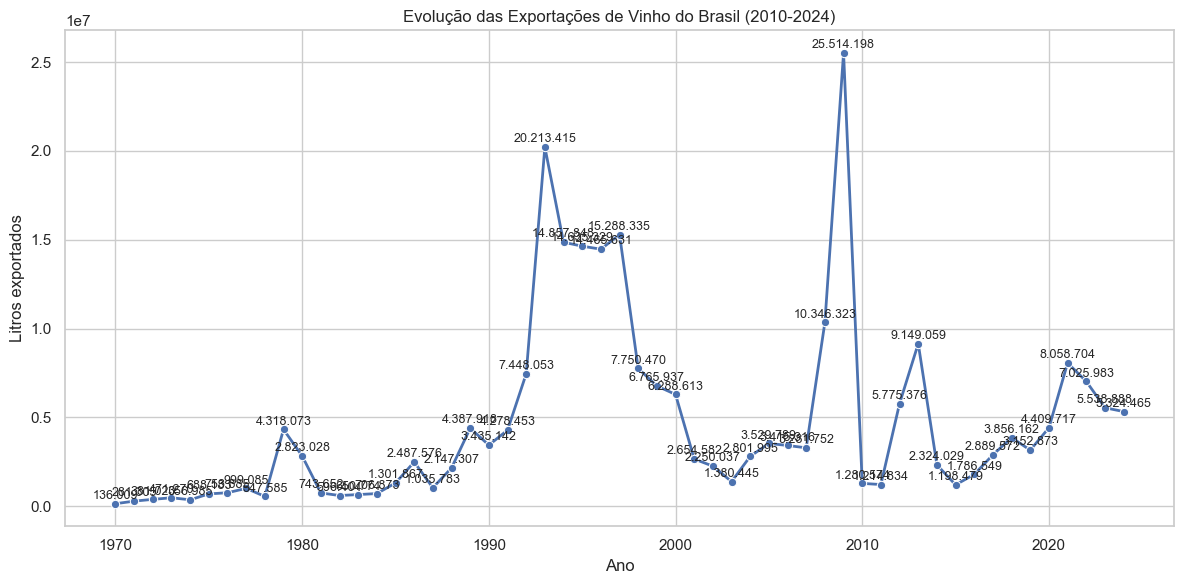

In [6]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=export_por_ano, x="ano", y="litros", marker="o", linewidth=2)

# Mostrar os dados numéricos
print("Exportações Totais por Ano (Litros):")
print(export_por_ano)

# Adicionar os valores sobre cada ponto (formatado)
for i in range(len(export_por_ano)):
    ano = export_por_ano["ano"][i]
    litros = export_por_ano["litros"][i]
    label = f"{litros:,.0f}".replace(",", ".")  # formato brasileiro
    plt.text(ano, litros + 100000, label, ha='center', va='bottom', fontsize=9)

plt.title("Evolução das Exportações de Vinho do Brasil (2010-2024)")
plt.ylabel("Litros exportados")
plt.xlabel("Ano")
plt.tight_layout()
plt.show()


**Exportações por País (Top 10 - 2010 a 2024)**

Top 10 Países Importadores (Litros) – Últimos 15 anos:
             país    litros
0        Paraguai  34021588
1          Rússia  10909283
2  Estados Unidos   3287390
3           Haiti   2797418
4         Espanha   1988248
5         Uruguai   1155417
6     Reino Unido   1135468
7           China   1055501
8           Japão    783687
9   Países Baixos    729406


C:\Users\zirn\AppData\Local\Temp\ipykernel_31936\4064373519.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_paises_df, y="país", x="litros", palette="viridis")


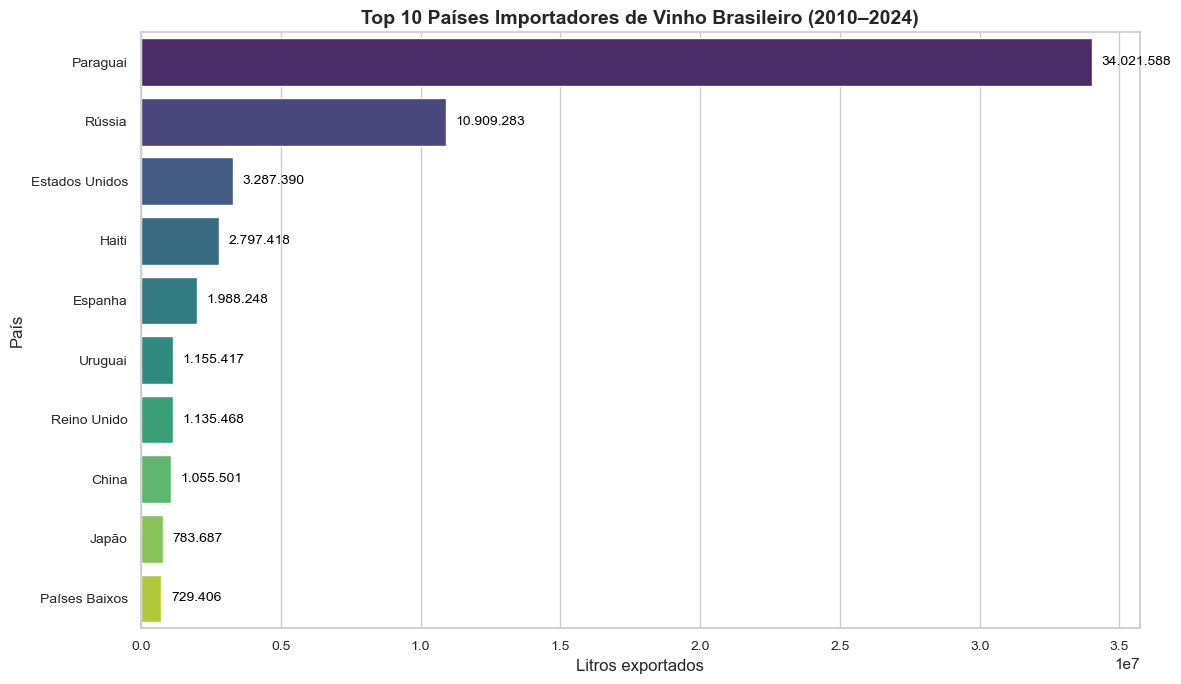

In [7]:
# Filtrar apenas os dados dos últimos 15 anos (2010 a 2024)
export_filtrado = export_df[export_df["ano"].between(2010, 2024)]

# Agrupar os dados por país e somar as exportações
top_paises = export_filtrado.groupby("país")["litros"].sum().sort_values(ascending=False).head(10)

# Resetar índice para transformar em DataFrame
top_paises_df = top_paises.reset_index()
top_paises_df.columns = ["país", "litros"]

# Exibir os dados
print("Top 10 Países Importadores (Litros) – Últimos 15 anos:")
print(top_paises_df)

# Criar gráfico com rótulos formatados
plt.figure(figsize=(12, 7))
sns.barplot(data=top_paises_df, y="país", x="litros", palette="viridis")

# Adicionar rótulos com separador de milhar brasileiro
for index, row in top_paises_df.iterrows():
    litros_formatado = f"{int(row['litros']):,}".replace(",", ".")
    plt.text(row["litros"] + max(top_paises_df["litros"]) * 0.01,
             index, litros_formatado,
             va='center', fontsize=10, color="black")

# Títulos e labels
plt.title("Top 10 Países Importadores de Vinho Brasileiro (2010–2024)", fontsize=14, weight='bold')
plt.xlabel("Litros exportados")
plt.ylabel("País")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

**Heatmap (2010 a 2024)**

C:\Users\zirn\AppData\Local\Temp\ipykernel_31936\1152704890.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_df = heatmap_df.applymap(lambda x: f"{int(x):,}".replace(",", ".") if x > 0 else "")


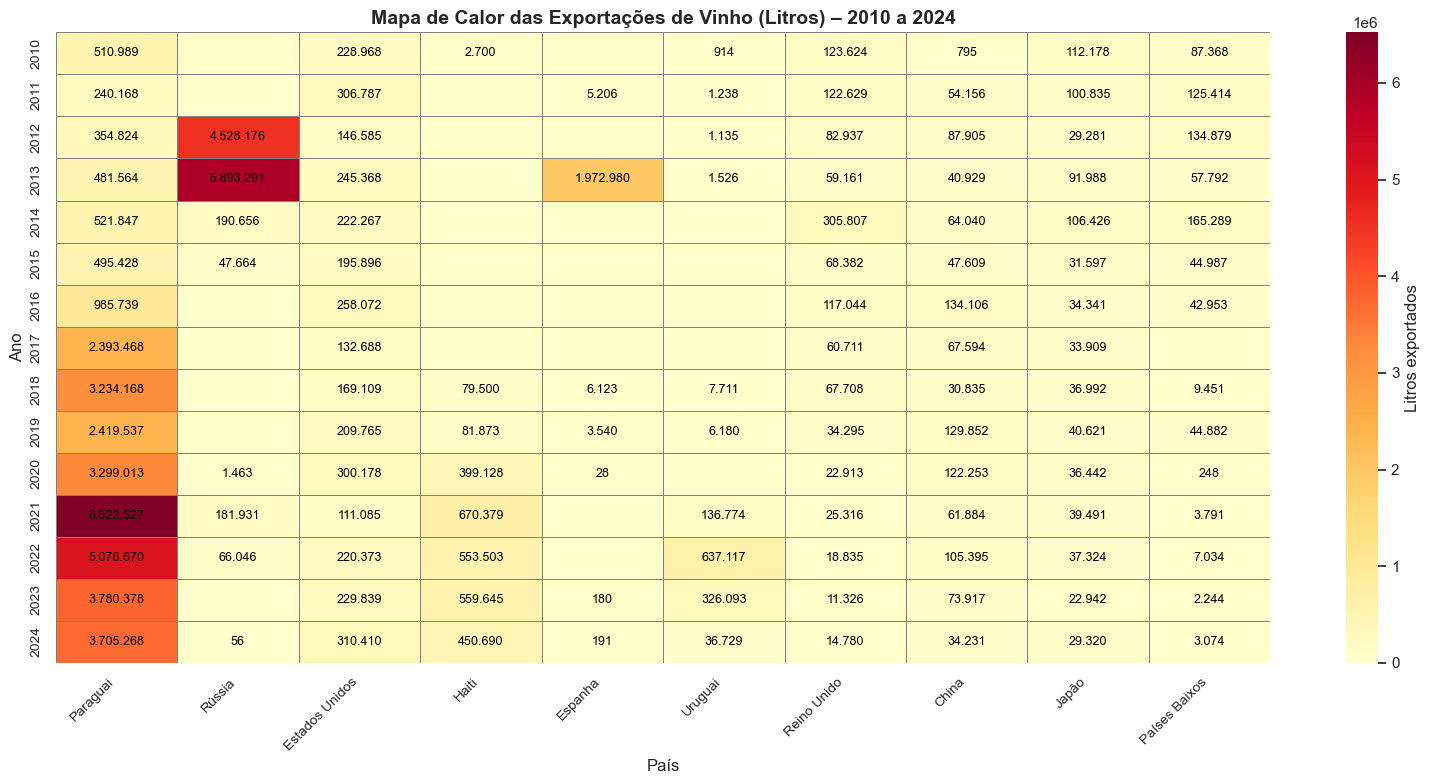

In [8]:
# Pivô da tabela: Ano vs País vs Litros
heatmap_df = export_df.pivot_table(index="ano", columns="país", values="litros", aggfunc="sum").fillna(0)

# top 10 paises 
top_paises = export_df.groupby("país")["litros"].sum().sort_values(ascending=False).head(10).index
heatmap_df = heatmap_df[top_paises]

#  Formatando valores para string (com ponto) para exibir como anotação
annot_df = heatmap_df.applymap(lambda x: f"{int(x):,}".replace(",", ".") if x > 0 else "")

#  Gráfico com anotações
plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_df, cmap="YlOrRd", linewidths=0.5, linecolor='gray',
            annot=annot_df, fmt='', cbar_kws={'label': 'Litros exportados'},
            annot_kws={"fontsize": 9, "color": "black"})

plt.title("Mapa de Calor das Exportações de Vinho (Litros) – 2010 a 2024", fontsize=14, weight='bold')
plt.xlabel("País")
plt.ylabel("Ano")
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

**CLIMA x PRODUÇÃO (2010 a 2024)**

Index(['nome', 'ano', 'quantidade_(kg)', 'quantidade_(kg)'], dtype='object')
Index(['nome', 'ano', 'quantidade_(kg)', 'quantidade_(kg)',
       'temperatura_c_mean', 'temperatura_c_max', 'temperatura_c_min',
       'precipitacao_mm_mean', 'precipitacao_mm_max', 'precipitacao_mm_min',
       'vento_m_s_mean', 'vento_m_s_max', 'vento_m_s_min'],
      dtype='object')


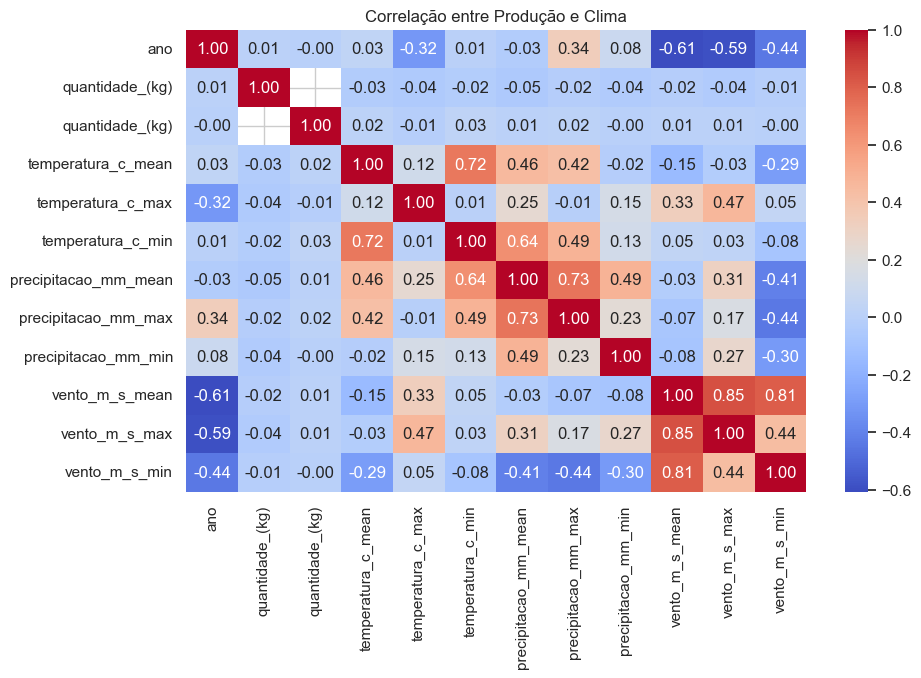

                           ano  quantidade_(kg)  quantidade_(kg)  \
ano                   1.000000         0.010336        -0.003364   
quantidade_(kg)       0.010336         1.000000              NaN   
quantidade_(kg)      -0.003364              NaN         1.000000   
temperatura_c_mean    0.034652        -0.030513         0.018442   
temperatura_c_max    -0.315586        -0.044614        -0.012167   
temperatura_c_min     0.007113        -0.023920         0.028888   
precipitacao_mm_mean -0.033196        -0.051527         0.014047   
precipitacao_mm_max   0.340221        -0.021406         0.018697   
precipitacao_mm_min   0.084083        -0.040145        -0.001246   
vento_m_s_mean       -0.606798        -0.022234         0.010949   
vento_m_s_max        -0.593982        -0.036798         0.010123   
vento_m_s_min        -0.438253        -0.011704        -0.000133   

                      temperatura_c_mean  temperatura_c_max  \
ano                             0.034652          -0

In [9]:
# 2. Garantir que os nomes das colunas estejam limpos
producao_df.columns = producao_df.columns.str.strip().str.lower()
clima_df.columns = clima_df.columns.str.strip().str.lower()

# Verificar os nomes das colunas para garantir que a produção está correta
print(producao_df.columns)  # Verificar o nome da coluna de produção

# 3. Agrupar o clima por ano (média anual por variável)
clima_anual_df = clima_df.groupby("ano").mean(numeric_only=True).reset_index()

# 4. Mesclar os dados pelo ano
df_merged = pd.merge(producao_df, clima_anual_df, on="ano", how="inner")

# Verificar as colunas após o merge
print(df_merged.columns)

# 5. Correlação (somente numéricas)
correlacao = df_merged.select_dtypes(include='number').corr()

# 6. Mapa de calor de correlação
plt.figure(figsize=(10, 6))
sns.heatmap(correlacao, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlação entre Produção e Clima")
plt.show()

# 7. Exibir a matriz de correlação
print(correlacao)


**Vento (vento_m_s): A correlação é negativa (-0.59), o que indica que anos com maior vento tendem a ter menor produção. Isso sugere que o vento forte pode ter um impacto negativo na produtividade.**

aqui pode ser encaixado uma Análise Preditiva: Se o objetivo for prever a produção com base nas variáveis climáticas, podemos construir um modelo de regressão ou usar outras técnicas de aprendizado de máquina para ver se conseguimos prever a produção com maior precisão.


Temperatura Máxima: Temperaturas muito altas (>35°C) podem causar danos às plantas, interrompendo a fotossíntese e levando a uma desidratação excessiva das folhas. Isso pode afetar negativamente a qualidade das uvas, prejudicando a acidez, o açúcar e os compostos fenólicos, que são importantes para o sabor e a cor do vinho.

Temperatura Mínima: As temperaturas mínimas também são cruciais. Durante a noite, as videiras precisam de uma temperatura baixa o suficiente para uma recuperação adequada das plantas e para o desenvolvimento da acidez das uvas. Temperaturas abaixo de 0°C podem danificar as videiras, especialmente em regiões onde o risco de geadas é alto.

Referência:

Jackson, D. I., & Lombard, P. B. (1993). Environmental and management practices affecting grape composition and wine quality—A review. American Journal of Enology and Viticulture, 44(4), 409-430.

**ECONOMIA x EXPORTAÇÃO (2010 a 2024)**

Exportações Columns: Index(['país', 'ano', 'quantidade (kg)', 'valor_usd'], dtype='object')
Produção Columns: Index(['nome', 'ano', 'quantidade (kg)'], dtype='object')
Clima Columns: Index(['ano', 'temperatura_c_mean', 'temperatura_c_max', 'temperatura_c_min',
       'precipitacao_mm_mean', 'precipitacao_mm_max', 'precipitacao_mm_min',
       'vento_m_s_mean', 'vento_m_s_max', 'vento_m_s_min'],
      dtype='object')
Economia Columns: Index(['country name', 'year', 'gdp', 'inflation rate', 'taxa de câmbio',
       'population'],
      dtype='object')
Index(['country name', 'year', 'gdp', 'inflation rate', 'taxa de câmbio',
       'population', 'país', 'ano', 'quantidade (kg)', 'valor_usd'],
      dtype='object')


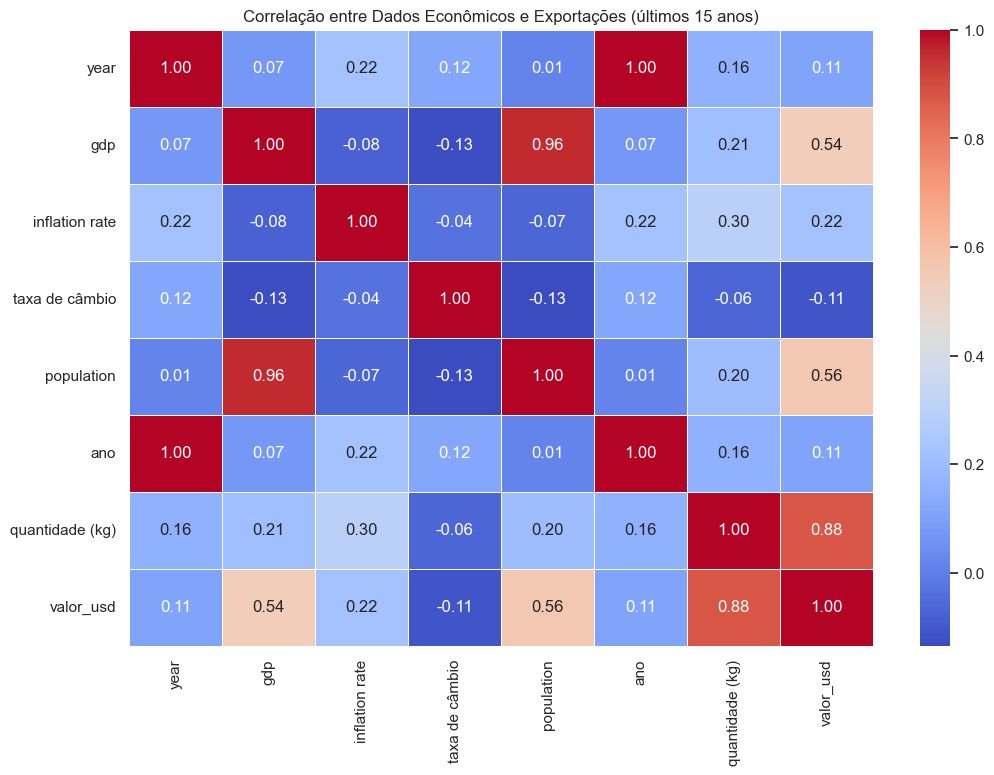

                     year       gdp  inflation rate  taxa de câmbio  \
year             1.000000  0.070353        0.220628        0.120277   
gdp              0.070353  1.000000       -0.079018       -0.126131   
inflation rate   0.220628 -0.079018        1.000000       -0.035180   
taxa de câmbio   0.120277 -0.126131       -0.035180        1.000000   
population       0.014268  0.956368       -0.065892       -0.134076   
ano              1.000000  0.070353        0.220628        0.120277   
quantidade (kg)  0.155222  0.209785        0.295647       -0.063605   
valor_usd        0.113415  0.535561        0.222351       -0.107496   

                 population       ano  quantidade (kg)  valor_usd  
year               0.014268  1.000000         0.155222   0.113415  
gdp                0.956368  0.070353         0.209785   0.535561  
inflation rate    -0.065892  0.220628         0.295647   0.222351  
taxa de câmbio    -0.134076  0.120277        -0.063605  -0.107496  
population         1

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo dos gráficos
sns.set(style="whitegrid")

# 1. Carregar os datasets com os caminhos fornecidos
export_df = pd.read_csv("zProjeto_Final/Datasets/Exportacao.csv")
producao_df = pd.read_csv("zProjeto_Final/Datasets/Producao.csv")
clima_df = pd.read_csv("zProjeto_Final/Datasets/resumo_climatico_anual.csv")
economia_df = pd.read_csv("zProjeto_Final/Datasets/dados_economicos.csv")

# 2. Limpeza das colunas e formatação dos dados
export_df.columns = export_df.columns.str.strip().str.lower()
producao_df.columns = producao_df.columns.str.strip().str.lower()
clima_df.columns = clima_df.columns.str.strip().str.lower()
economia_df.columns = economia_df.columns.str.strip().str.lower()

# Verificando os nomes das colunas após a limpeza
print("Exportações Columns:", export_df.columns)
print("Produção Columns:", producao_df.columns)
print("Clima Columns:", clima_df.columns)
print("Economia Columns:", economia_df.columns)

# 3. Filtrar os dados dos últimos 15 anos
ano_atual = 2025  # Assumindo que o ano atual é 2025
anos_filtrados = range(ano_atual - 15, ano_atual + 1)

economia_df = economia_df[economia_df['year'].isin(anos_filtrados)]
export_df = export_df[export_df['ano'].isin(anos_filtrados)]

# 4. Mesclar os dados por País e Ano
df_merged = pd.merge(economia_df, export_df, left_on=["country name", "year"], right_on=["país", "ano"], how="inner")

# 5. Verificar as colunas após a mesclagem
print(df_merged.columns)

# 6. Correlação entre as variáveis econômicas e de exportação
correlacao = df_merged.select_dtypes(include='number').corr()

# 7. Plotar mapa de calor da correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlacao, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlação entre Dados Econômicos e Exportações (últimos 15 anos)")
plt.show()

print(correlacao)


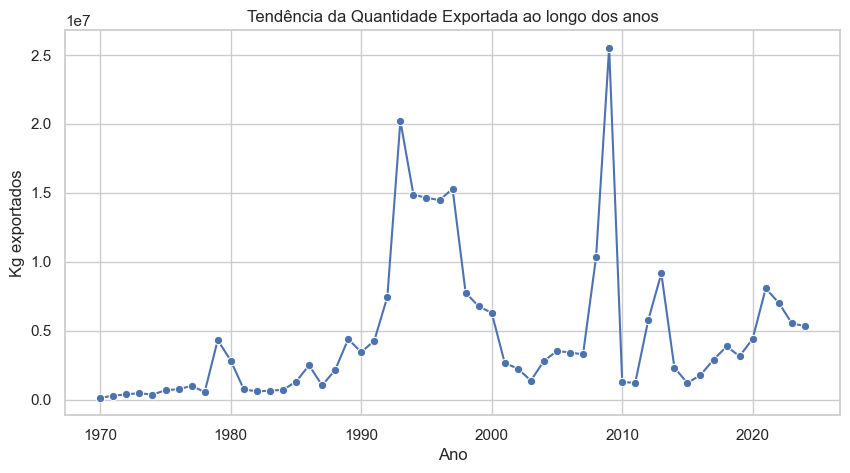

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar
exp = pd.read_csv('zProjeto_Final/Datasets/Exportacao.csv')
exp_group = exp.groupby('Ano', as_index=False).agg({'Quantidade (kg)': 'sum', 'Valor_USD': 'sum'})

plt.figure(figsize=(10,5))
sns.lineplot(exp_group, x='Ano', y='Quantidade (kg)', marker='o')
plt.title('Tendência da Quantidade Exportada ao longo dos anos')
plt.ylabel('Kg exportados')
plt.grid(True)
plt.show()


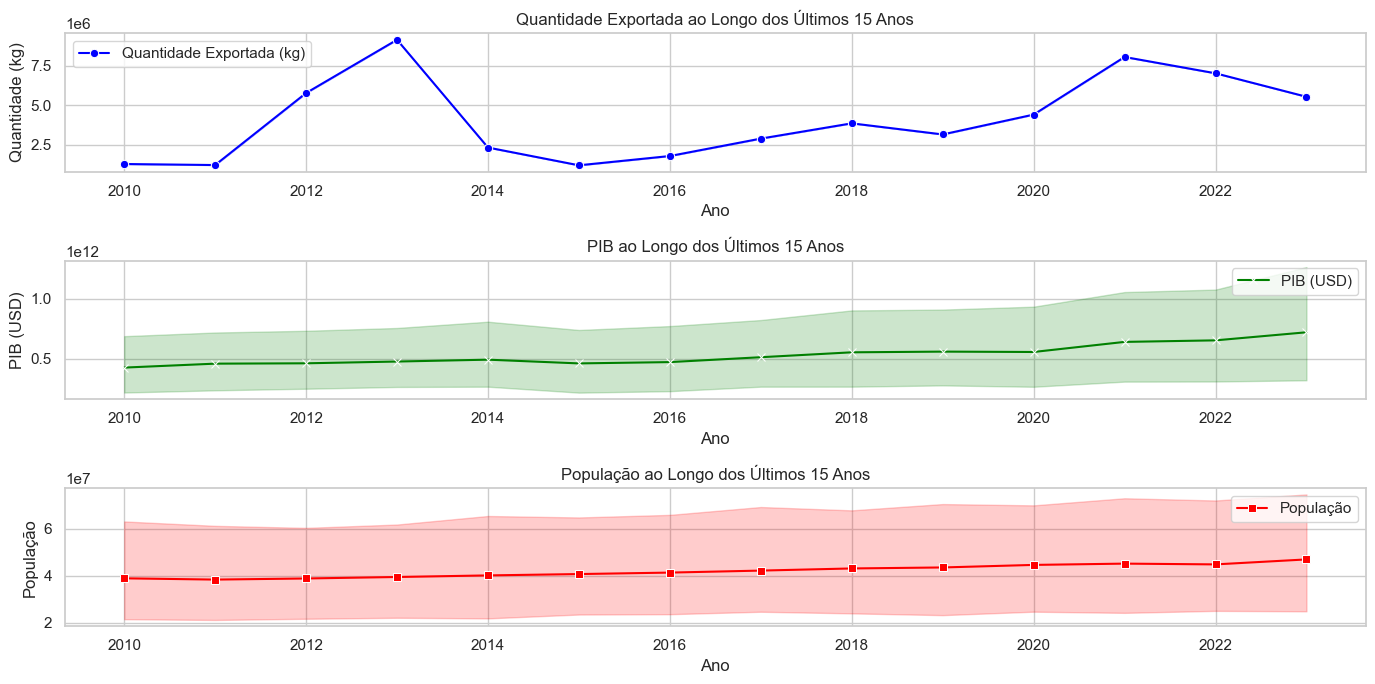

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados de exportação
exp = pd.read_csv('zProjeto_Final/Datasets/Exportacao.csv')

# Agrupar os dados de exportação por ano
exp_group = exp.groupby('Ano', as_index=False).agg({'Quantidade (kg)': 'sum', 'Valor_USD': 'sum'})

# Carregar os dados econômicos
economics = pd.read_csv('zProjeto_Final/Datasets/dados_economicos.csv')

# Mesclar os dados de exportação e dados econômicos com base no ano
data = pd.merge(exp_group, economics, left_on='Ano', right_on='Year')

# Filtrar os últimos 15 anos (do ano atual, 2025)
data = data[data['Ano'] >= 2010]  # Altere o valor para o ano mais recente se necessário

# Calcular PIB per capita e exportação per capita
data['PIB_per_capita'] = data['GDP'] / data['Population']
data['Exportacao_per_capita'] = data['Quantidade (kg)'] / data['Population']

# Gráfico 1: Comparação entre Quantidade Exportada, PIB e População
plt.figure(figsize=(14, 7))

plt.subplot(3, 1, 1)
sns.lineplot(data=data, x='Ano', y='Quantidade (kg)', label='Quantidade Exportada (kg)', marker='o', color='blue')
plt.title('Quantidade Exportada ao Longo dos Últimos 15 Anos')
plt.ylabel('Quantidade (kg)')
plt.grid(True)

plt.subplot(3, 1, 2)
sns.lineplot(data=data, x='Ano', y='GDP', label='PIB (USD)', marker='x', color='green')
plt.title('PIB ao Longo dos Últimos 15 Anos')
plt.ylabel('PIB (USD)')
plt.grid(True)

plt.subplot(3, 1, 3)
sns.lineplot(data=data, x='Ano', y='Population', label='População', marker='s', color='red')
plt.title('População ao Longo dos Últimos 15 Anos')
plt.ylabel('População')
plt.grid(True)

plt.tight_layout()
plt.show()


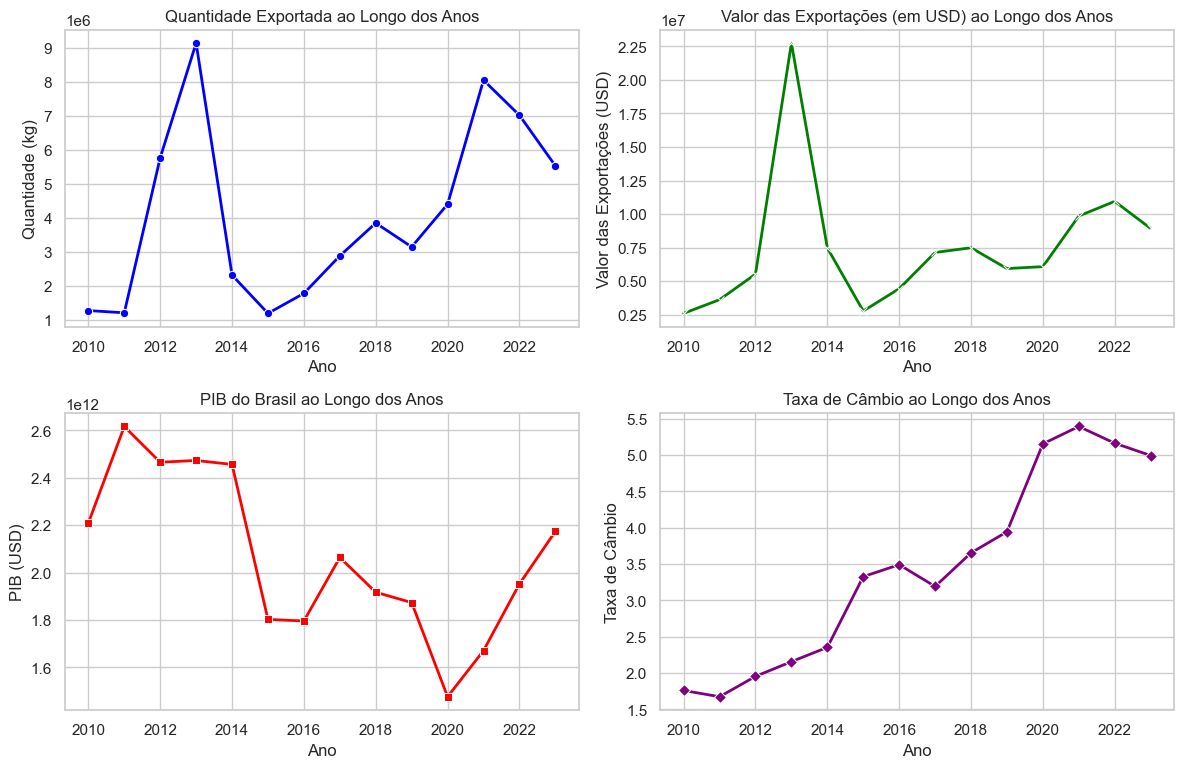

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados de exportação
exp = pd.read_csv('zProjeto_Final/Datasets/Exportacao.csv')

# Agrupar os dados de exportação por ano
exp_group = exp.groupby('Ano', as_index=False).agg({'Quantidade (kg)': 'sum', 'Valor_USD': 'sum'})

# Carregar os dados econômicos
economics = pd.read_csv('zProjeto_Final/Datasets/dados_economicos.csv')

# Garantir que estamos tratando apenas do Brasil
economics = economics[economics['Country Name'] == 'Brazil']

# Mesclar os dados de exportação e dados econômicos com base no ano
data = pd.merge(exp_group, economics, left_on='Ano', right_on='Year')

# Filtrar os últimos 15 anos (do ano atual, 2025)
data = data[data['Ano'] >= 2010]  # Ajuste de ano conforme necessário

# Calcular a variação percentual da taxa de câmbio
data['Taxa_Cambio_Variacao_Percentual'] = data['Taxa de Câmbio'].pct_change() * 100  # Variação percentual

# Calcular PIB per capita e exportação per capita
data['PIB_per_capita'] = data['GDP'] / data['Population']
data['Exportacao_per_capita'] = data['Quantidade (kg)'] / data['Population']

# Configurações dos gráficos
plt.figure(figsize=(12, 8))

# Gráfico 1: Quantidade Exportada ao Longo dos Anos
plt.subplot(2, 2, 1)
sns.lineplot(data=data, x='Ano', y='Quantidade (kg)', marker='o', color='blue', linewidth=2)
plt.title('Quantidade Exportada ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Quantidade (kg)')
plt.grid(True)

# Gráfico 2: Valor das Exportações (em USD) ao Longo dos Anos
plt.subplot(2, 2, 2)
sns.lineplot(data=data, x='Ano', y='Valor_USD', marker='x', color='green', linewidth=2)
plt.title('Valor das Exportações (em USD) ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Valor das Exportações (USD)')
plt.grid(True)

# Gráfico 3: PIB do Brasil ao Longo dos Anos
plt.subplot(2, 2, 3)
sns.lineplot(data=data, x='Ano', y='GDP', marker='s', color='red', linewidth=2)
plt.title('PIB do Brasil ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('PIB (USD)')
plt.grid(True)

# Gráfico 4: Taxa de Câmbio ao Longo dos Anos
plt.subplot(2, 2, 4)
sns.lineplot(data=data, x='Ano', y='Taxa de Câmbio', marker='D', color='purple', linewidth=2)
plt.title('Taxa de Câmbio ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Taxa de Câmbio')
plt.grid(True)

# Ajustando o layout para exibição adequada
plt.tight_layout()
plt.show()


In [54]:
import pandas as pd

# Carregar os dados de exportação
exp = pd.read_csv('zProjeto_Final/Datasets/Exportacao.csv')

# Agrupar os dados de exportação por ano
exp_group = exp.groupby('Ano', as_index=False).agg({'Quantidade (kg)': 'sum', 'Valor_USD': 'sum'})

# Carregar os dados econômicos
economics = pd.read_csv('zProjeto_Final/Datasets/dados_economicos.csv')

# Garantir que estamos tratando apenas do Brasil
economics = economics[economics['Country Name'] == 'Brazil']

# Mesclar os dados de exportação e dados econômicos com base no ano
data = pd.merge(exp_group, economics, left_on='Ano', right_on='Year')

# Filtrar os últimos 15 anos (do ano atual, 2025)
data = data[data['Ano'] >= 2010]  # Ajuste de ano conforme necessário

# Calcular PIB per capita e exportação per capita
data['PIB_per_capita'] = data['GDP'] / data['Population']
data['Exportacao_per_capita'] = data['Quantidade (kg)'] / data['Population']

# Calcular a variação percentual da taxa de câmbio
data['Taxa_Cambio_Variacao_Percentual'] = data['Taxa de Câmbio'].pct_change() * 100  # Variação percentual

# Calcular as correlações
correlacao_taxa_qtd_exportada = data['Taxa de Câmbio'].corr(data['Quantidade (kg)'])
correlacao_taxa_valor_exportado = data['Taxa de Câmbio'].corr(data['Valor_USD'])
correlacao_pib_qtd_exportada = data['GDP'].corr(data['Quantidade (kg)'])
correlacao_pib_valor_exportado = data['GDP'].corr(data['Valor_USD'])
correlacao_qtd_valor_exportado = data['Quantidade (kg)'].corr(data['Valor_USD'])

# Exibir as correlações
print("Correlação entre Taxa de Câmbio e Quantidade Exportada: ", correlacao_taxa_qtd_exportada)
print("Correlação entre Taxa de Câmbio e Valor das Exportações: ", correlacao_taxa_valor_exportado)
print("Correlação entre PIB e Quantidade Exportada: ", correlacao_pib_qtd_exportada)
print("Correlação entre PIB e Valor das Exportações: ", correlacao_pib_valor_exportado)
print("Correlação entre Quantidade Exportada e Valor das Exportações: ", correlacao_qtd_valor_exportado)


Correlação entre Taxa de Câmbio e Quantidade Exportada:  0.39758697969184204
Correlação entre Taxa de Câmbio e Valor das Exportações:  0.09620824051973506
Correlação entre PIB e Quantidade Exportada:  -0.023319369715412885
Correlação entre PIB e Valor das Exportações:  0.204836556323269
Correlação entre Quantidade Exportada e Valor das Exportações:  0.8237248593503201


A relação moderada de 0.40 indica que a taxa de câmbio tem um impacto considerável na quantidade de produtos exportados. Isso é esperado, pois uma desvalorização da moeda brasileira geralmente torna os produtos mais baratos no mercado internacional, o que pode aumentar a competitividade das exportações.


Correlação entre PIB e Valor das Exportações: 0.20

A correlação de 0.20 sugere uma relação fraca e positiva entre o PIB e o valor das exportações. O aumento do PIB pode ter um pequeno impacto no valor das exportações, mas a relação é fraca e pode ser influenciada por outros fatores.

In [ ]:
import pandas as pd

# Carregar o CSV
df = pd.read_csv('zProjeto_Final/Datasets/Tudo_Junto.csv', sep=',')  

# Converter o ano para número
df['Ano'] = pd.to_numeric(df['Ano'], errors='coerce')

# Determinar o ano de corte para os últimos 15 anos
ano_corte = df['Ano'].max() - 14

# Manter apenas os dados dos últimos 15 anos e com Quantidade Total (kg) > 0
df_filtrado = df[(df['Ano'] >= ano_corte) & (df['Quantidade Total (kg)'] > 0)]

# Agrupar por Nome e somar a Quantidade Total (kg)
df_agrupado = df_filtrado.groupby('Nome', as_index=False)['Quantidade Total (kg)'].sum()

# Ordenar da mais produzida para a menos produzida
df_ordenado = df_agrupado.sort_values(by='Quantidade Total (kg)', ascending=False)

# Mostrar as mais produzidas
print('=== Mais produzidas nos últimos 15 anos (valores > 0) ===')
print(df_ordenado)

# Mostrar as menos produzidas (últimas 5)
print('\n=== Menos produzidas nos últimos 15 anos (valores > 0) ===')
print(df_ordenado.tail())


=== Mais produzidas nos últimos 15 anos (valores > 0) ===
                                 Nome  Quantidade Total (kg)
142                            TINTAS           6.396915e+09
64                             Isabel           2.656020e+09
26                              Bordo           1.560458e+09
8                   BRANCAS E ROSADAS           1.509454e+09
104                    Niagara Branca           4.216511e+08
..                                ...                    ...
119                         Primitivo           1.650000e+03
38                       Clairette(1)           9.490000e+02
89   Mistura de uvas viníferas tinto            7.000000e+02
63                                IAC           6.500000e+02
159                         Zinfandel           3.720000e+02

[160 rows x 2 columns]

=== Menos produzidas nos últimos 15 anos (valores > 0) ===
                                 Nome  Quantidade Total (kg)
119                         Primitivo                 1650.0
38  

C:\Users\zirn\AppData\Local\Temp\ipykernel_31936\3835621300.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


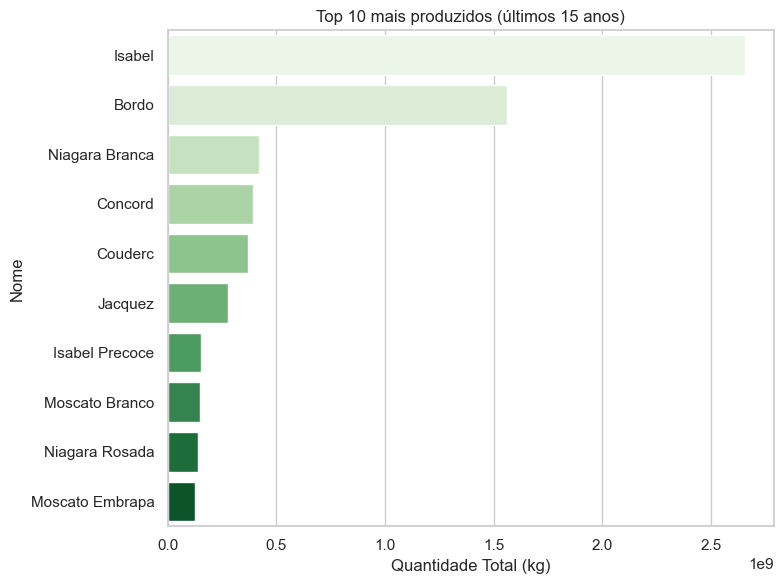

C:\Users\zirn\AppData\Local\Temp\ipykernel_31936\3835621300.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


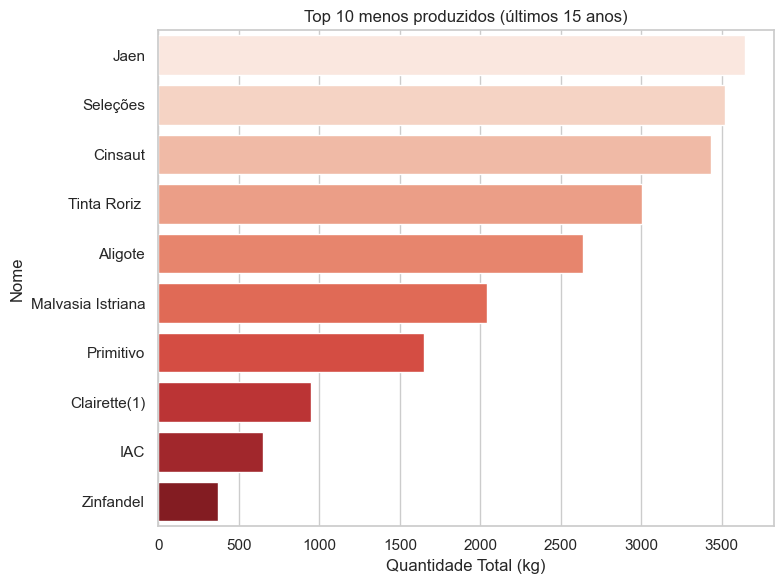

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar o estilo
sns.set_theme(style="whitegrid")

# Carregar o CSV
df = pd.read_csv('zProjeto_Final/Datasets/Tudo_Junto.csv', sep=',')

# Converter o ano para número
df['Ano'] = pd.to_numeric(df['Ano'], errors='coerce')

# Últimos 15 anos
ano_corte = df['Ano'].max() - 14

# Definir padrões que queremos EXCLUIR
padroes_excluir = ['BRANCAS', 'ROSADAS', 'TINTAS', 'Mistura de uvas viníferas tinto']

# Criar máscara para remover essas categorias
mascara_excluir = df['Nome'].str.contains('|'.join(padroes_excluir), case=False, na=False)

# Filtrar:
df_filtrado = df[
    (df['Ano'] >= ano_corte) &
    (df['Quantidade Total (kg)'] > 0) &
    (~mascara_excluir)  # Mantém apenas o que NÃO contém os padrões acima
]

# Agrupar por Nome
df_agrupado = df_filtrado.groupby('Nome', as_index=False)['Quantidade Total (kg)'].sum()

# Ordenar
df_ordenado = df_agrupado.sort_values(by='Quantidade Total (kg)', ascending=False)

# Selecionar top 10 e bottom 10
top_10 = df_ordenado.head(10)
bottom_10 = df_ordenado.tail(10)

# Gráfico top 10 mais produzidos 
plt.figure(figsize=(8, 6))
sns.barplot(
    data=top_10.sort_values('Quantidade Total (kg)', ascending=False),
    x='Quantidade Total (kg)',
    y='Nome',
    palette='Greens'
)
plt.title('Top 10 mais produzidos (últimos 15 anos)')
plt.xlabel('Quantidade Total (kg)')
plt.ylabel('Nome')
plt.tight_layout()
plt.show()

# Gráfico top 10 menos produzidos 
plt.figure(figsize=(8, 6))
sns.barplot(
    data=bottom_10.sort_values('Quantidade Total (kg)', ascending=False),
    x='Quantidade Total (kg)',
    y='Nome',
    palette='Reds'
)
plt.title('Top 10 menos produzidos (últimos 15 anos)')
plt.xlabel('Quantidade Total (kg)')
plt.ylabel('Nome')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar o estilo
sns.set_theme(style="whitegrid")

# Carregar o CSV
df = pd.read_csv('zProjeto_Final/Datasets/Tudo_Junto.csv', sep=',')

# Converter o ano para número
df['Ano'] = pd.to_numeric(df['Ano'], errors='coerce')

# Últimos 15 anos
ano_corte = df['Ano'].max() - 14

# Definir padrões que queremos EXCLUIR
padroes_excluir = ['BRANCAS', 'ROSADAS', 'TINTAS', 'Mistura de uvas viníferas tinto']

# Criar máscara para remover essas categorias
mascara_excluir = df['Nome'].str.contains('|'.join(padroes_excluir), case=False, na=False)

# Filtrar:
df_filtrado = df[
    (df['Ano'] >= ano_corte) &
    (df['Quantidade Total (kg)'] > 0) &
    (~mascara_excluir)  # Mantém apenas o que NÃO contém os padrões acima
]

# Agrupar por Nome
df_agrupado = df_filtrado.groupby('Nome', as_index=False)['Quantidade Total (kg)'].sum()

# Ordenar
df_ordenado = df_agrupado.sort_values(by='Quantidade Total (kg)', ascending=False)

# Selecionar top 10 e bottom 10
top_10 = df_ordenado.head(10)
bottom_10 = df_ordenado.tail(10)

# Gráfico top 10 mais produzidos
plt.figure(figsize=(8, 6))
sns.barplot(
    data=top_10.sort_values('Quantidade Total (kg)', ascending=True),
    x='Quantidade Total (kg)',
    y='Nome',
    palette='Greens'
)
plt.title('Top 10 mais produzidos (últimos 15 anos)')
plt.xlabel('Quantidade Total (kg)')
plt.ylabel('Nome')
plt.tight_layout()
plt.show()

# Gráfico top 10 menos produzidos
plt.figure(figsize=(8, 6))
sns.barplot(
    data=bottom_10.sort_values('Quantidade Total (kg)', ascending=True),
    x='Quantidade Total (kg)',
    y='Nome',
    palette='Reds'
)
plt.title('Top 10 menos produzidos (últimos 15 anos)')
plt.xlabel('Quantidade Total (kg)')
plt.ylabel('Nome')
plt.tight_layout()
plt.show()


*PIB tem uma correlação positiva moderada com o valor das exportações (0.535561), sugerindo que países com PIB maior tendem a ter um valor mais alto de exportações.*

*Inflação e taxa de câmbio têm correlações fracas com a quantidade de exportações, mas a inflação tem uma correlação mais forte com o valor das exportações do que a taxa de câmbio.*

*População tem uma correlação muito forte com o PIB (0.956368), mas sua correlação com a quantidade de exportações e valor das exportações é moderada.*

**PIB e a população têm maior influência nas exportações de um país do que a taxa de câmbio ou a inflação.**

1. Prospecções Futuras para as Exportações
As projeções para as exportações nos próximos anos podem ser influenciadas por vários fatores, como mudanças no clima, políticas econômicas e mudanças nas preferências do mercado global. Abaixo, estão alguns pontos chave para as projeções:

a. Impacto do Clima nas Exportações
O aquecimento global pode impactar negativamente a produção de uvas, como discutido anteriormente. O aumento das temperaturas pode afetar a qualidade das uvas e reduzir a produção. Portanto, a mudança climática precisa ser monitorada de perto para entender as mudanças nos padrões de produção e exportação.

Projeção: Aumento de demanda de vinhos mais leves (menor teor alcoólico) devido ao aumento das temperaturas médias.

b. Influência Econômica
A taxa de câmbio e a inflação são variáveis que podem afetar diretamente a competitividade das exportações de um país. Se o valor da moeda local aumentar, os produtos podem se tornar mais caros no mercado internacional, impactando a demanda.

Projeção: Estabilidade na taxa de câmbio ajudará a manter as exportações competitivas. Países com um câmbio mais forte podem ser menos competitivos a longo prazo.

c. Crescimento Populacional e Demografia Global
O crescimento da população global é um fator chave. Com o aumento da população, espera-se que haja uma demanda crescente por produtos alimentícios e bebidas, incluindo o vinho.

Projeção: Aumento das exportações para mercados emergentes, como a Ásia, onde o consumo de vinho está crescendo.

d. Novos Mercados
O mercado asiático, especialmente a China e a Índia, está se tornando cada vez mais relevante para as exportações de alimentos e bebidas, incluindo o vinho.

Projeção: Aumento das exportações para países em desenvolvimento, enquanto as exportações para mercados tradicionais (EUA, Europa) podem crescer de forma mais lenta.

2. Ações para Melhorar as Exportações
Para melhorar as exportações, especialmente para os próximos anos, algumas ações podem ser implementadas com foco em eficiência produtiva, estratégias de marketing e expansão de mercados. Aqui estão algumas ideias:

a. Diversificação e Inovação no Produto
Ações:

Introdução de novos tipos de produtos (vinhos orgânicos ou veganos, vinhos com menor teor alcoólico).

Inovação no design da embalagem e em novas ofertas (como kits de presente ou garrafas personalizadas) pode ajudar a criar uma diferenciação no mercado internacional.

Certificações de qualidade e sustentabilidade (certificados orgânicos, Fair Trade) podem agregar valor ao produto.

b. Melhoria nas Práticas Agrícolas e Tecnologia
Ações:

Investir em tecnologias para monitoramento climático, como sistemas de previsão de clima mais precisos, que podem ajudar a antecipar as condições ideais para a colheita e melhorar a qualidade da produção.

Tecnologias de irrigação e uso mais eficiente de recursos, minimizando o impacto de secas ou excesso de chuvas.

Porta-enxertos resistentes ao estresse térmico e ao solo salino podem ser uma estratégia de longo prazo.

c. Expansão para Novos Mercados
Ações:

Investir em pesquisa de mercado para entender melhor os hábitos de consumo de novos mercados, especialmente na Ásia e em outros países em desenvolvimento.

Participar de feiras internacionais e missões comerciais para promover os produtos e estabelecer novas parcerias comerciais.

Promoção de exportação no mercado interno, com apoio do governo e de instituições de comércio exterior.

d. Marketing e Branding Internacional
Ações:

Criar campanhas de marketing focadas em histórias locais e autenticidade para agregar valor ao produto. O consumidor global está cada vez mais interessado no histórico e na cultura por trás do produto.

Utilização de plataformas digitais e e-commerce para facilitar as vendas diretas para o consumidor em mercados internacionais.

Parcerias com sommeliers e críticos de vinho para promover a marca em mercados de alto padrão.

e. Parcerias Público-Privadas
Ações:

Estabelecer parcerias com entidades governamentais e comerciais para incentivar as exportações, como o apoio à redução de tarifas ou incentivos fiscais para produtores e exportadores.

Trabalhar com agências de exportação e câmaras de comércio para melhorar a rede de distribuição internacional.

3. Monitoramento de Indicadores Econômicos e Climáticos
A utilização de dados em tempo real pode ser uma ferramenta poderosa para antecipar problemas e se adaptar rapidamente:

Monitoramento contínuo da taxa de câmbio e suas flutuações para ajustar a estratégia de preços.

Análise preditiva com base em dados climáticos para prever anos de baixa ou alta produção e ajustar as exportações conforme necessário.

Conclusão
Com base nas análises e tendências globais, as projeções para o crescimento das exportações de vinho e outros produtos podem ser positivas, desde que os desafios climáticos e econômicos sejam geridos adequadamente. As ações propostas — como diversificação de produtos, inovação tecnológica e expansão para novos mercados — podem melhorar significativamente o montante de exportação, permitindo uma adaptação mais ágil às mudanças e aproveitando as oportunidades nos mercados internacionais.